# PROJECT: Retail
## Project task: Week 1
### Data Cleaning

- 1) Performing a preliminary data inspection and data cleaning.

In [1]:
# Importing Relevant libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#importing dataset
retail=pd.read_excel('online_retail_II.xlsx')

In [3]:
#Checking first five rows of the dataframe
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
#Checking shape
retail.shape

(525461, 8)

In [5]:
#Printing info about the dataframe
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


## There seems to be null values in the 'Description' and 'CustomerID' columns

In [6]:
#Cleaning text in the description column
for text in retail['Description'].unique(): 
    try:
        if (('.'in text) or ('+'in text) or ('?'in text) or ('/'in text) or ('&'in text) or ('*' in text)): #checking for uneccessary symbols in description
            print(text) 
    except:
        continue

CINAMMON & ORANGE WREATH
EUCALYPTUS & PINECONE  WREATH
VINTAGE SNAKES & LADDERS
CHARLIE+LOLA RED HOT WATER BOTTLE 
CHARLIE+LOLA PINK HOT WATER BOTTLE
CHARLIE + LOLA RED HOT WATER BOTTLE
TOMATO CHARLIE+LOLA COASTER SET
CARROT CHARLIE+LOLA COASTER SET
CHARLIE + LOLA BISCUITS TINS
CHARLIE & LOLA WASTEPAPER BIN BLUE
CHARLIE & LOLA WASTEPAPER BIN FLORA
BLACK/BLUE DOTS RUFFLED UMBRELLA
RED/WHITE DOTS RUFFLED UMBRELLA
RETRO SPORT PARTY BAG + STICKER SET
SET/3 RUSSIAN DOLL STACKING TINS
RED WOOLLY HOTTIE WHITE HEART.
UNION JACK GUNS & ROSES  DOORMAT
YELLOW + BROWN BEAR FELT PURSE KIT
SET/3 RED GINGHAM ROSE STORAGE BOX
SET/2 RED SPOTTY TEA TOWELS 
LADIES & GENTLEMEN METAL SIGN
SET/6 STRAWBERRY PAPER CUPS
SET/6 WOODLAND PAPER CUPS
SET/6 WOODLAND PAPER PLATES
CHARLOTTE BAG , PINK/WHITE SPOTS
PINK ENAMEL+GLASS HAIR COMB
PURPLE ENAMEL+GLASS HAIR COMB
BLUE CHARLIE+LOLA PERSONAL DOORSIGN
RED CHARLIE+LOLA PERSONAL DOORSIGN
DOOR HANGER  MUM + DADS ROOM
WOOD S/3 CABINET ANT WHITE FINISH
CERAMIC CAKE BOW

## Dirty text found in the Description column

In [7]:
#Cleaning text
retail['Description']=retail['Description'].str.replace('  ',' ')
retail['Description']=retail['Description'].str.replace('.','')
retail['Description']=retail['Description'].str.replace('+'," and ")
retail['Description']=retail['Description'].str.replace('*','')
retail['Description']=retail['Description'].str.replace('&',' and ')
retail['Description']=retail['Description'].str.replace('SET/','SET OF ')
retail['Description']=retail['Description'].str.replace('S/','SET OF ')
retail['Description']=retail['Description'].str.replace('pack/','pack of ')
retail['Description']=retail['Description'].str.replace('PACK/','pack of ')
retail['Description']=retail['Description'].str.replace('/',' ')
retail['Description']=retail['Description'].str.replace('?','')

C:\Users\faiza\AppData\Local\Temp\ipykernel_2016\1215155248.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  retail['Description']=retail['Description'].str.replace('.','')
C:\Users\faiza\AppData\Local\Temp\ipykernel_2016\1215155248.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  retail['Description']=retail['Description'].str.replace('+'," and ")
C:\Users\faiza\AppData\Local\Temp\ipykernel_2016\1215155248.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  retail['Description']=retail['Description'].str.replace('

In [8]:
# Checking for dirty text in the decription column again
for text in retail['Description'].unique(): 
    try:
        if (('.'in text) or ('+'in text) or ('?'in text) or ('/'in text) or ('&'in text) or ('*' in text)): #checking for uneccessary symbols in description
            print(text) 
    except:
        continue

## No output. Hence, the text in the Description column is clean now for the most part.

In [9]:
#Checking for bad text in the country column
retail.Country.unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

## Country column is clean.

### Checking for missing data and formulating an apt strategy to treat them.

In [10]:
retail.isnull().sum()

Invoice             0
StockCode           0
Description      2931
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [12]:
# Removing negative Quantity and UnitPrice column values
retail=retail[(retail['Quantity']>0) & (retail['Price']>0)]
print(retail.isna().sum())

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    103902
Country             0
dtype: int64


### Removing the negative values in quantity and unit price column because those do not contribute anything to the RFM analysis.Also, this approach takes care of the null values in the Description column

In [14]:
# Finding the top 10 most frequent customers
print(retail['Customer ID'].value_counts().to_frame().reset_index().iloc[:10,0].to_list())
top_10_cust=retail['Customer ID'].value_counts().to_frame().reset_index().iloc[:10,0].to_list()

[14911.0, 17841.0, 14606.0, 14156.0, 12748.0, 17850.0, 16549.0, 15311.0, 14646.0, 14527.0]


In [15]:
#Filling null values in the CustomerID column with the top most frequent customers
for cust in top_10_cust:
    retail['Customer ID'].fillna(cust,inplace=True,limit=13222,axis=0)

C:\Users\faiza\AppData\Local\Temp\ipykernel_2016\2229130447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Customer ID'].fillna(cust,inplace=True,limit=13222,axis=0)


### Implemented Strategy: Instead of dropping 132220 null records, filling the null values with the top 10 frequent values of Customer IDs should fairly take care of the missing values issue.Here, the top 10 CustomerID values are evenly distributed(132220/10) among the CustomerID column

In [16]:
#Checking for null values again
retail.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### Removing duplicate data records

In [17]:
#Checking for duplicate records
retail.duplicated().to_frame().value_counts()

False    504731
True       6835
dtype: int64

#### More than 6000 duplicated data records found.

In [18]:
#Removing duplicate records
retail=retail[~(retail.duplicated())]

In [19]:
#Checking for duplicate records again
retail.duplicated().to_frame().value_counts()

False    504731
dtype: int64

#### Duplicate data records are no more

In [20]:
# CustomerID cannot be float.Therefore, converting it into integer
retail['Customer ID']=retail['Customer ID'].astype('int')

C:\Users\faiza\AppData\Local\Temp\ipykernel_2016\3164378387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Customer ID']=retail['Customer ID'].astype('int')


In [21]:
retail.describe()

,Quantity,Price,Customer ID
count,504731.000000,504731.000000,504731.000000
mean,11.516923,4.274692,15389.949910
std,87.337497,64.093333,1685.203172
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14156.000000
50%,3.000000,2.100000,15311.000000
75%,12.000000,4.210000,16814.000000
max,19152.000000,25111.090000,18287.000000


## Data Transformation
#### Performing cohort analysis. Observing how a cohort behaves across time and compare it to other cohorts.

#### Creating month cohorts and analyzing active customers for each cohort

In [22]:
retail.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [23]:
#creating a function to get month

def acquire_month(x):
    return dt.datetime(x.year,x.month,1)

In [24]:
#Applying the function to get month
retail['invoice month']=retail['InvoiceDate'].apply(acquire_month)
retail.head(1)

C:\Users\faiza\AppData\Local\Temp\ipykernel_2016\1788702454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['invoice month']=retail['InvoiceDate'].apply(acquire_month)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01


In [26]:
#Finding active customers in each cohort
month_cohort=retail.groupby('invoice month')['Customer ID'].count().to_frame().reset_index()
month_cohort['month']=month_cohort['invoice month'].dt.strftime('%B %Y')
month_cohort.rename(columns={'Customer ID':'total active customers'},inplace=True)
month_cohort

,invoice month,total active customers,month
0,2009-12-01,43453,December 2009
1,2010-01-01,30317,January 2010
2,2010-02-01,27953,February 2010
3,2010-03-01,39841,March 2010
4,2010-04-01,32858,April 2010
5,2010-05-01,33383,May 2010
6,2010-06-01,38391,June 2010
7,2010-07-01,32112,July 2010
8,2010-08-01,32109,August 2010
9,2010-09-01,40630,September 2010


In [27]:
#Finding highest customer activity
highest_customer_activity=month_cohort.sort_values(by='total active customers',ascending=False)['total active customers'].head(1).values
#Finding it's month
highest_customer_activity_month=month_cohort.sort_values(by='total active customers',ascending=False)['month'].head(1).values
#Finding lowest customer activity
lowest_customer_activity=month_cohort.sort_values(by='total active customers',ascending=True)['total active customers'].head(1).values
#Finding it's month
lowest_customer_activity_month=month_cohort.sort_values(by='total active customers',ascending=True)['month'].head(1).values

In [28]:
#cohort mini analysis
print('highest active customers: {} for month: {}\n\nlowest active customers: {} for month: {}\n\naverage customers in the year: {}'.\
      format(highest_customer_activity,highest_customer_activity_month,lowest_customer_activity,lowest_customer_activity_month,\
             int(month_cohort['total active customers'].mean())))

highest active customers: [75035] for month: ['November 2010']

lowest active customers: [21696] for month: ['December 2010']

average customers in the year: 38825


#### Analyzing the retention rate of customers

In [30]:
#Finding the month when the customer was acquired
retail['customer acquisition month']=retail.groupby('Customer ID')['invoice month'].transform('min')
retail.tail(3)

C:\Users\faiza\AppData\Local\Temp\ipykernel_2016\3587545286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['customer acquisition month']=retail.groupby('Customer ID')['invoice month'].transform('min')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice month,customer acquisition month
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,2010-12-01,2009-12-01
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,2010-12-01,2009-12-01
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530,United Kingdom,2010-12-01,2009-12-01


In [31]:
# Creating a function to calculate day, month, and year
def get_month_year(df,column):
    month=pd.DatetimeIndex(df[column]).month
    year=pd.DatetimeIndex(df[column]).year
    return (month,year)

In [32]:
#calculating month offset
invoice_month,invoice_year=get_month_year(retail,'invoice month')
customer_acquisiton_month,customer_acquisiton_year=get_month_year(retail,'customer acquisition month')

year_diff=invoice_year-customer_acquisiton_year
month_diff=invoice_month-customer_acquisiton_month

retail['customer active months']=year_diff*12+month_diff+1 #Adding 1 because considering the acquisition month itself

C:\Users\faiza\AppData\Local\Temp\ipykernel_2016\1275134599.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['customer active months']=year_diff*12+month_diff+1 #Adding 1 because considering the acquisition month itself


In [33]:
retail.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice month,customer acquisition month,customer active months
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01,2009-12-01,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01,2009-12-01,1


- If 1 wasn't added to the customer active months during month offset calculation, then the active months would be 0 instead of 1 for those customers who only remained active during their entire customer acquistion month itself.

In [34]:
retail.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice month,customer acquisition month,customer active months
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,2010-12-01,2009-12-01,13
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,2010-12-01,2009-12-01,13
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,2010-12-01,2009-12-01,13
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,2010-12-01,2009-12-01,13
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530,United Kingdom,2010-12-01,2009-12-01,13


In [36]:
#Grouping table by acquisition month and customer active months
customer_retention=retail.groupby(['customer acquisition month','customer active months'])['Customer ID'].apply(pd.Series.nunique).to_frame().reset_index()
customer_retention

,customer acquisition month,customer active months,Customer ID
0,2009-12-01,1,955
1,2009-12-01,2,337
2,2009-12-01,3,319
3,2009-12-01,4,406
4,2009-12-01,5,363
...,...,...,...
86,2010-10-01,2,97
87,2010-10-01,3,35
88,2010-11-01,1,325
89,2010-11-01,2,35


In [38]:
#creating a pivot table for customer retention
retention_pivot_table=pd.pivot_table(data=customer_retention,columns='customer active months',index='customer acquisition month',values='Customer ID').reset_index()
retention_pivot_table.rename(columns={'customer acquisition month':'cohort month'},inplace=True)
#formatting date
retention_pivot_table['cohort month']=retention_pivot_table['cohort month'].dt.strftime('%B %Y')
retention_pivot_table.set_index('cohort month',inplace=True)
retention_pivot_table

customer active months,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort month,,,,,,,,,,,,,
December 2009,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,404.0,473.0,237.0
January 2010,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
February 2010,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
March 2010,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
April 2010,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
May 2010,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
June 2010,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2010,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2010,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
customer_retention_rate=retention_pivot_table.divide(retention_pivot_table.iloc[:,0],axis=0)
#Presenting customer retention rate
customer_retention_rate

customer active months,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort month,,,,,,,,,,,,,
December 2009,1.0,0.352880,0.334031,0.425131,0.380105,0.359162,0.376963,0.342408,0.336126,0.362304,0.423037,0.495288,0.248168
January 2010,1.0,0.206266,0.310705,0.305483,0.263708,0.300261,0.258486,0.229765,0.279373,0.318538,0.302872,0.099217,NaN
February 2010,1.0,0.237968,0.224599,0.291444,0.245989,0.200535,0.192513,0.286096,0.254011,0.275401,0.072193,NaN,NaN
March 2010,1.0,0.189616,0.230248,0.241535,0.232506,0.203160,0.246050,0.302483,0.275395,0.079007,NaN,NaN,NaN
April 2010,1.0,0.193878,0.193878,0.163265,0.183673,0.224490,0.275510,0.261905,0.068027,NaN,NaN,NaN,NaN
May 2010,1.0,0.157480,0.169291,0.173228,0.177165,0.255906,0.212598,0.078740,NaN,NaN,NaN,NaN,NaN
June 2010,1.0,0.174074,0.188889,0.203704,0.229630,0.285185,0.066667,NaN,NaN,NaN,NaN,NaN,NaN
July 2010,1.0,0.155914,0.182796,0.295699,0.290323,0.102151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2010,1.0,0.203704,0.296296,0.320988,0.117284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='customer active months', ylabel='cohort month'>

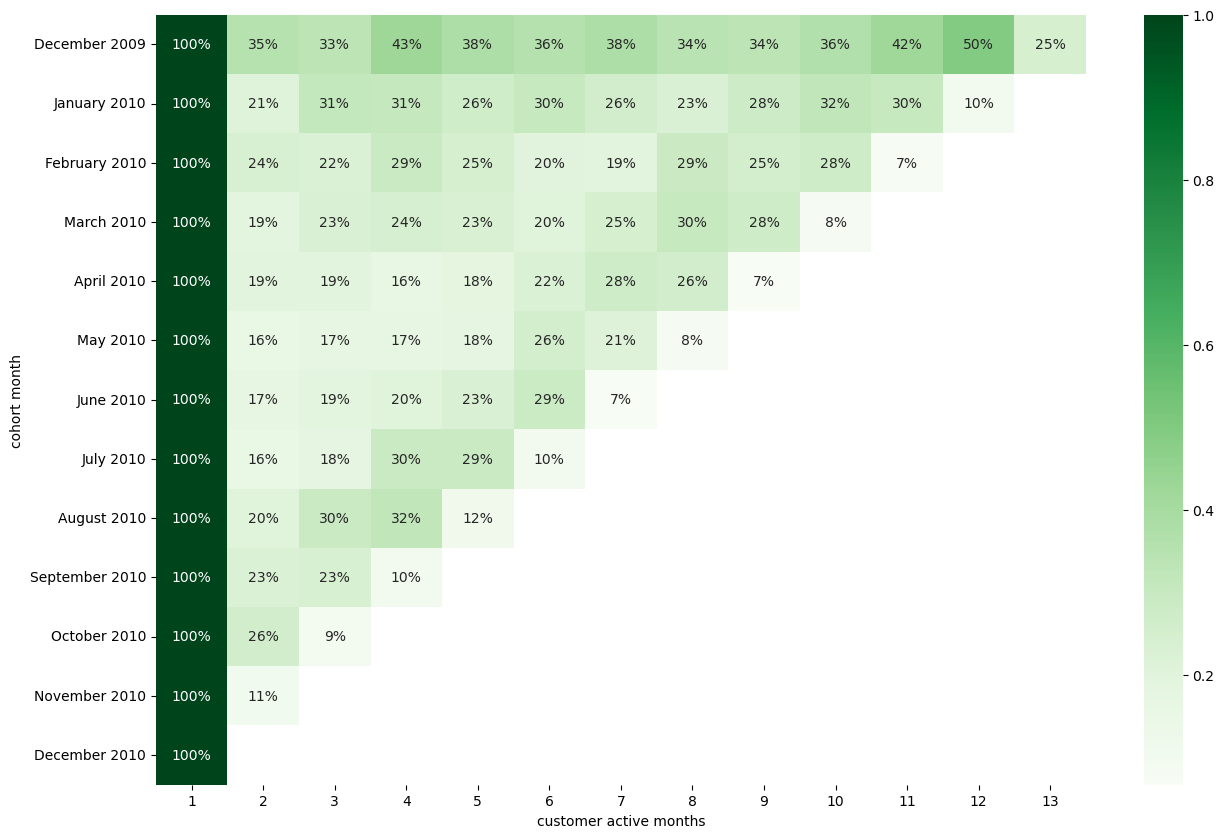

In [40]:
#visualizing customer retention rate
plt.figure(figsize=(15,10))
sns.heatmap(data=customer_retention_rate,annot=True,cmap='Greens',fmt='.0%')

- INFERENCE1: Highest customer retention is for December 2009 cohort which is 50%(12 months since the customer acquisition)

- INFERENCE2: Lowest customer retention is for May 2010 cohort which is 8%(8 months since the custommer acquisition)

# Project Task: Week 2
## RFM Data Modeling
### Calculating RFM metrics

In [42]:
#Calculating amount spent by each customer on each order
retail['amount_spent']=retail['Quantity']*retail['Price']

C:\Users\faiza\AppData\Local\Temp\ipykernel_2016\3390786820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['amount_spent']=retail['Quantity']*retail['Price']


In [43]:
#Getting the latest date
latest_date=retail['InvoiceDate'].max()

In [45]:
#calculating rfm metrics
rfm_metrics=retail.groupby('Customer ID').agg({'InvoiceDate':lambda x: (latest_date-x.max()).days\
                                              ,'Invoice':'count',\
                                              'amount_spent':'sum'}).reset_index()
#renaming columns
rfm_metrics.columns=['Customer ID','recency','frequency','monetary']
rfm_metrics.head()

,Customer ID,recency,frequency,monetary
0,12346,164,33,372.86
1,12347,2,71,1323.32
2,12348,73,20,222.16
3,12349,42,102,2671.14
4,12351,10,21,300.93


## RFM metrics
### Building RFM Segments. Giving recency, frequency, and monetary scores individually by dividing them into quartiles.
#### Combining three ratings to get a RFM segment (as strings).

In [46]:
# Finding quantiles for rfm metrics
quartiles=rfm_metrics[['recency','frequency','monetary']].quantile(q=[0.25,0.50,0.75]) #taking Q1,Q2,Q3 quartiles
quartiles

,recency,frequency,monetary
0.25,17.0,18.0,307.1875
0.50,52.0,43.0,701.6150
0.75,135.0,100.0,1714.9325


In [47]:
# creating rating functions for the metrics
def r_score(x): # Rating most recent higher and least recent lower
    if x<=quartiles.loc[0.25,'recency']:
        return 4
    elif x<=quartiles.loc[0.50,'recency']:
        return 3
    elif x<=quartiles.loc[0.75,'recency']:
        return 2
    else:
        return 1

def f_score(x): #Rating most frequent higher and least frequent lower
    if x>= quartiles.loc[0.75,'frequency']:
        return 4
    elif x>= quartiles.loc[0.50,'frequency']:
        return 3
    elif x>= quartiles.loc[0.25,'frequency']:
        return 2
    else:
        return 1
    
def m_score(x): #Rating high monetary higher and low monetary lower
    if x>= quartiles.loc[0.75,'monetary']:
        return 4
    elif x>=quartiles.loc[0.50,'monetary']:
        return 3
    elif x>=quartiles.loc[0.25,'monetary']:
        return 2
    else:
        return 1

In [48]:
# Caclculating ratings
rfm_metrics['r_score']=rfm_metrics['recency'].apply(r_score)
rfm_metrics['f_score']=rfm_metrics['frequency'].apply(f_score)
rfm_metrics['m_score']=rfm_metrics['monetary'].apply(m_score)
rfm_metrics

,Customer ID,recency,frequency,monetary,r_score,f_score,m_score
0,12346,164,33,372.86,1,2,2
1,12347,2,71,1323.32,4,3,3
2,12348,73,20,222.16,2,2,1
3,12349,42,102,2671.14,3,4,4
4,12351,10,21,300.93,4,2,1
...,...,...,...,...,...,...,...
4307,18283,17,217,619.37,4,4,2
4308,18284,66,28,461.68,2,2,2
4309,18285,295,12,427.00,1,1,2
4310,18286,111,67,1296.43,2,3,3


- 4 = highest rating; 1 = least rating

In [49]:
# Building RFM segment
rfm_metrics['RFM_segment']=rfm_metrics.r_score.astype(str)+rfm_metrics.f_score.astype(str)+rfm_metrics.m_score.astype(str)
rfm_metrics

,Customer ID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment
0,12346,164,33,372.86,1,2,2,122
1,12347,2,71,1323.32,4,3,3,433
2,12348,73,20,222.16,2,2,1,221
3,12349,42,102,2671.14,3,4,4,344
4,12351,10,21,300.93,4,2,1,421
...,...,...,...,...,...,...,...,...
4307,18283,17,217,619.37,4,4,2,442
4308,18284,66,28,461.68,2,2,2,222
4309,18285,295,12,427.00,1,1,2,112
4310,18286,111,67,1296.43,2,3,3,233


- RFM Segment 442 = Most valueable customer ; 112 = Churned customers

### Getting the RFM score by adding up the three ratings

In [51]:
#Adding all the scores to get an RFM score for each customer
rfm_metrics['RFM_score']=rfm_metrics.r_score+rfm_metrics.f_score+rfm_metrics.m_score
rfm_metrics

,Customer ID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment,RFM_score
0,12346,164,33,372.86,1,2,2,122,5
1,12347,2,71,1323.32,4,3,3,433,10
2,12348,73,20,222.16,2,2,1,221,5
3,12349,42,102,2671.14,3,4,4,344,11
4,12351,10,21,300.93,4,2,1,421,7
...,...,...,...,...,...,...,...,...,...
4307,18283,17,217,619.37,4,4,2,442,10
4308,18284,66,28,461.68,2,2,2,222,6
4309,18285,295,12,427.00,1,1,2,112,4
4310,18286,111,67,1296.43,2,3,3,233,8


- RFM score 11 = Most valuable customer ; 5 = Churned customers

In [52]:
#Creating customer segments based on rfm score
rfm_metrics['customer_segment']=0 # creating customer segment column
rfm_metrics.loc[(rfm_metrics.RFM_score>=3) & (rfm_metrics.RFM_score<=5),'customer_segment']='Churned customers'
rfm_metrics.loc[(rfm_metrics.RFM_score>=6) & (rfm_metrics.RFM_score<=8),'customer_segment']='MID level customers'
rfm_metrics.loc[(rfm_metrics.RFM_score>=9) & (rfm_metrics.RFM_score<=12),'customer_segment']='HIGH level customers'

In [53]:
rfm_metrics

,Customer ID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment,RFM_score,customer_segment
0,12346,164,33,372.86,1,2,2,122,5,Churned customers
1,12347,2,71,1323.32,4,3,3,433,10,HIGH level customers
2,12348,73,20,222.16,2,2,1,221,5,Churned customers
3,12349,42,102,2671.14,3,4,4,344,11,HIGH level customers
4,12351,10,21,300.93,4,2,1,421,7,MID level customers
...,...,...,...,...,...,...,...,...,...,...
4307,18283,17,217,619.37,4,4,2,442,10,HIGH level customers
4308,18284,66,28,461.68,2,2,2,222,6,MID level customers
4309,18285,295,12,427.00,1,1,2,112,4,Churned customers
4310,18286,111,67,1296.43,2,3,3,233,8,MID level customers


- RFM_score: 3-5 => Churned customers

- RFM_score: 6-8 => MID level customers

- RFM_score: 9-12 => HIGH level customers

#### Analyzing the RFM segments by summarizing them and comment on the findings.

In [55]:
#calculating average RFM_score
avg_rfm_score=rfm_metrics['RFM_score'].mean()
#calculating median rfm_score
median_rfm_score=rfm_metrics['RFM_score'].median()

In [56]:
# RFM segments summary
print('Average rfm score of all cusotmers is: {}\n\nMedian rfm score of all customers is: {}'\
     .format(round(avg_rfm_score,2),median_rfm_score))

Average rfm score of all cusotmers is: 7.53

Median rfm score of all customers is: 7.0


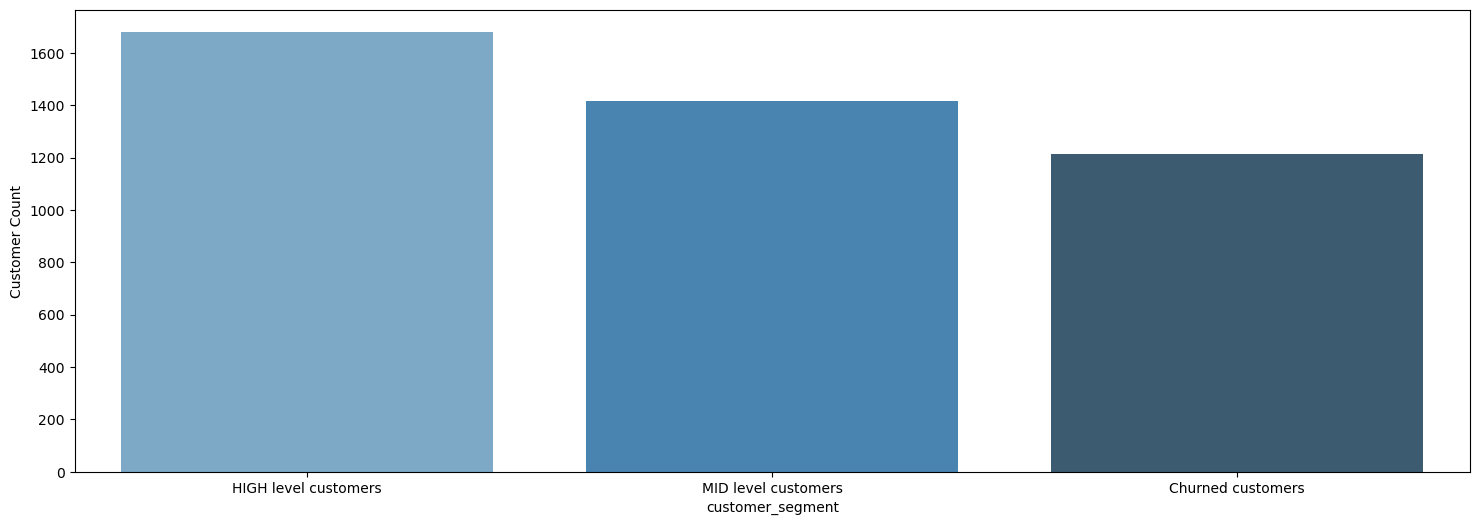

In [58]:
#Visualizing customer segments
plt.figure(figsize=(18,6))
sns.barplot(x='customer_segment',y='Customer ID',data=rfm_metrics,estimator=np.count_nonzero,palette="Blues_d",\
            order=['HIGH level customers','MID level customers','Churned customers'])
plt.ylabel('Customer Count')
plt.show()

Total high level customers are:1686

- Total mid level customers are:1381

- Total churned customers are:1271

- There is a possibility of getting the attention of the churned customers back if proper targetted marketing is performed

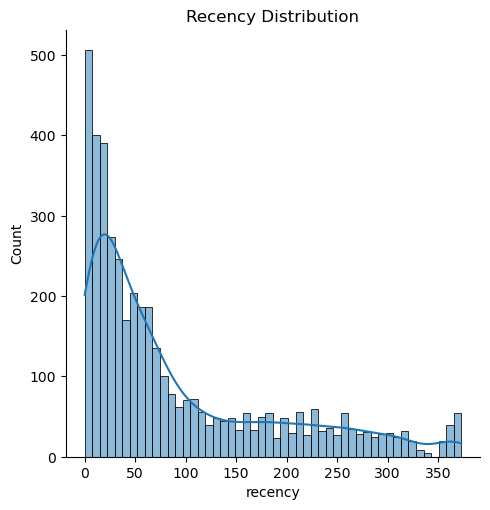

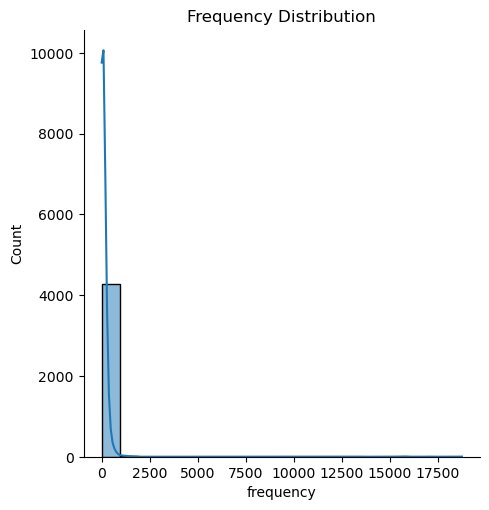

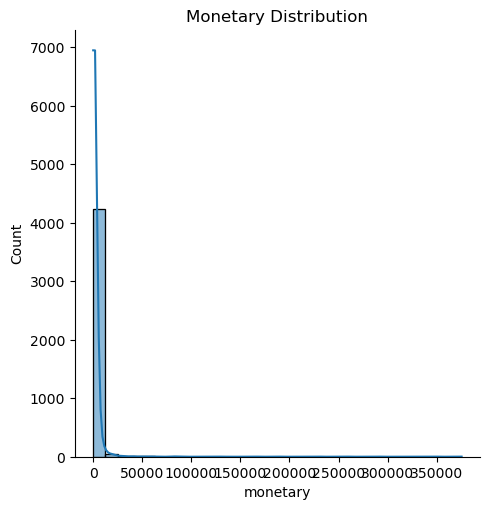

In [59]:
#Checking the distribution of the data

#Recency distribution
sns.displot(data=rfm_metrics,x='recency',kde=True,bins=50)
plt.title('Recency Distribution')
plt.show()
#Frequency distribution
sns.displot(data=rfm_metrics,x='frequency',kde=True,bins=20)
plt.title('Frequency Distribution')
plt.show()
#Monetary distribution
sns.displot(data=rfm_metrics,x='monetary',kde=True,bins=30)
plt.title('Monetary Distribution')
plt.show()

data is right skewed heavily for all RFM values

In [60]:
# handling Zero values because log transformation of zero value would result in infinte value

#Creating a function to manage zero values
def manage_zero_val(x):
    if x<=0:
        return 1
    else:
        return x
#applying function
rfm_metrics['recency']=rfm_metrics['recency'].apply(manage_zero_val)
rfm_metrics['frequency']=rfm_metrics['frequency'].apply(manage_zero_val)
rfm_metrics['monetary']=rfm_metrics['monetary'].apply(manage_zero_val)

In [61]:
# log transforming data
log_trans_data=rfm_metrics[['recency','frequency','monetary']].apply(np.log,axis=0).round(2)

In [62]:
log_trans_data

,recency,frequency,monetary
0,5.10,3.50,5.92
1,0.69,4.26,7.19
2,4.29,3.00,5.40
3,3.74,4.62,7.89
4,2.30,3.04,5.71
...,...,...,...
4307,2.83,5.38,6.43
4308,4.19,3.33,6.13
4309,5.69,2.48,6.06
4310,4.71,4.20,7.17


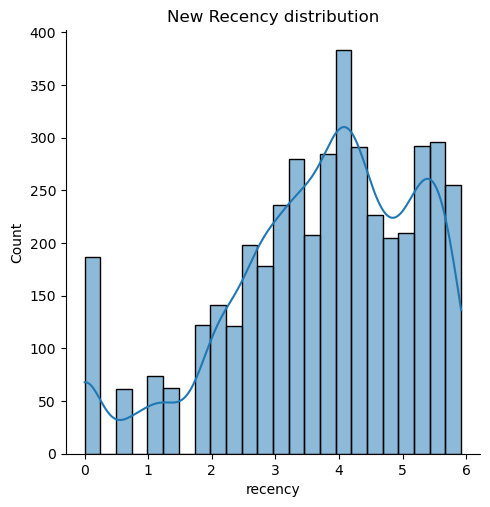

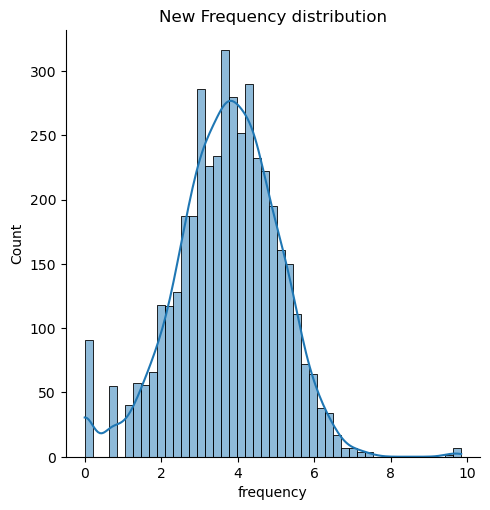

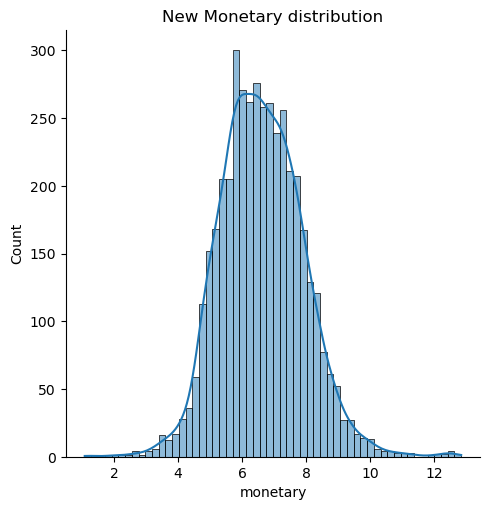

In [63]:
#Checking the distribution of the data again
sns.displot(data=log_trans_data,x='recency',kde=True)
plt.title('New Recency distribution')
plt.show()
sns.displot(data=log_trans_data,x='frequency',kde=True)
plt.title('New Frequency distribution')
plt.show()
sns.displot(data=log_trans_data,x='monetary',kde=True)
plt.title('New Monetary distribution')
plt.show()

- Better data distribution. Sknewness of the data has been taken care of

In [64]:
#Standardizing the data
ss=StandardScaler()
rfm_metrics_scaled=ss.fit_transform(log_trans_data)
rfm_metrics_scaled=pd.DataFrame(data=rfm_metrics_scaled,columns=log_trans_data.columns,index=log_trans_data.index)
rfm_metrics_scaled

,recency,frequency,monetary
0,0.927833,-0.158223,-0.531516
1,-2.077896,0.405541,0.447861
2,0.375760,-0.529120,-0.932520
3,0.000896,0.672586,0.987675
4,-0.980566,-0.499448,-0.693460
...,...,...,...
4307,-0.619334,1.236350,-0.138223
4308,0.307603,-0.284328,-0.369571
4309,1.329960,-0.914853,-0.423553
4310,0.662020,0.361033,0.432438


Scaled Data

Finding the optimum number of clusters to be formed

In [65]:
wcss=[] #sum of squares within cluster

for num in range(1,11):
    cluster=KMeans(n_clusters=num,random_state=16)
    cluster.fit(rfm_metrics_scaled)
    wcss.append(cluster.inertia_)

C:\Users\faiza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\faiza\anaconda3\lib\site-packages\sklearn\clust

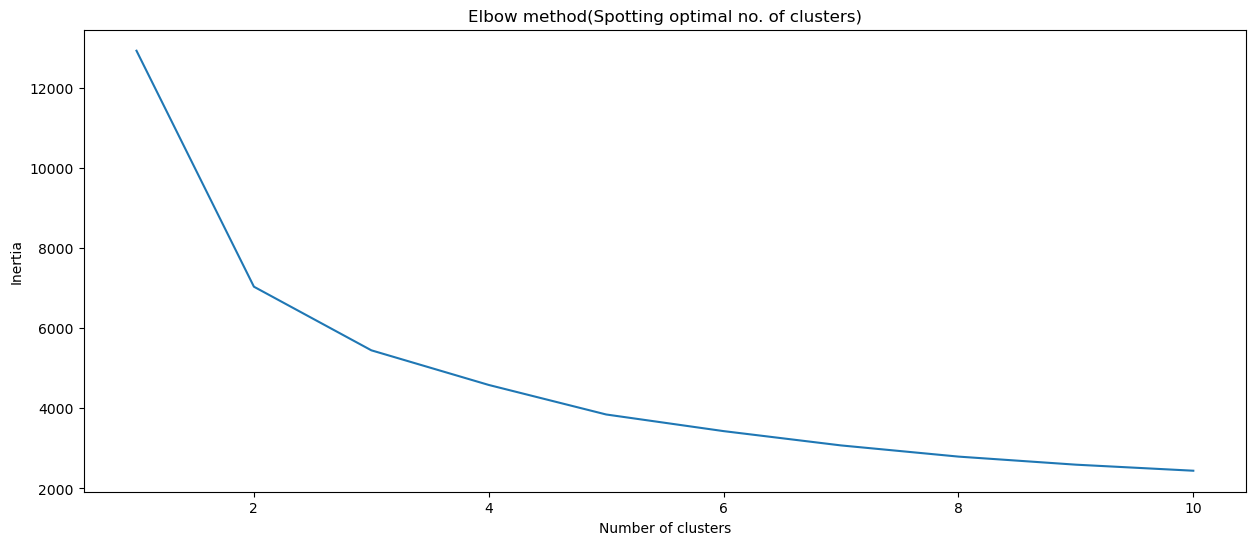

In [66]:
#Finding optimal number of clusters using elbow method
plt.figure(figsize=(15,6))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow method(Spotting optimal no. of clusters)")
plt.show()

- Judging by the graph the number optimal custers seem to be 3

In [67]:
# Perfoming kmeans clustering using optimal number of clusters
kmeans=KMeans(n_clusters=3,random_state=16)
kmeans.fit(rfm_metrics_scaled)

C:\Users\faiza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=16)

In [68]:
#Adding labels
label=kmeans.labels_
rfm_metrics['label']=label
rfm_metrics.head()

,Customer ID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment,RFM_score,customer_segment,label
0,12346,164,33,372.86,1,2,2,122,5,Churned customers,0
1,12347,2,71,1323.32,4,3,3,433,10,HIGH level customers,1
2,12348,73,20,222.16,2,2,1,221,5,Churned customers,0
3,12349,42,102,2671.14,3,4,4,344,11,HIGH level customers,2
4,12351,10,21,300.93,4,2,1,421,7,MID level customers,2


In [69]:
#custer centers
centers=kmeans.cluster_centers_
centers

array([[ 0.63742424, -0.96087864, -0.93227268],
       [-1.30997729,  1.09213412,  1.13334428],
       [ 0.10454523,  0.27533096,  0.23097087]])

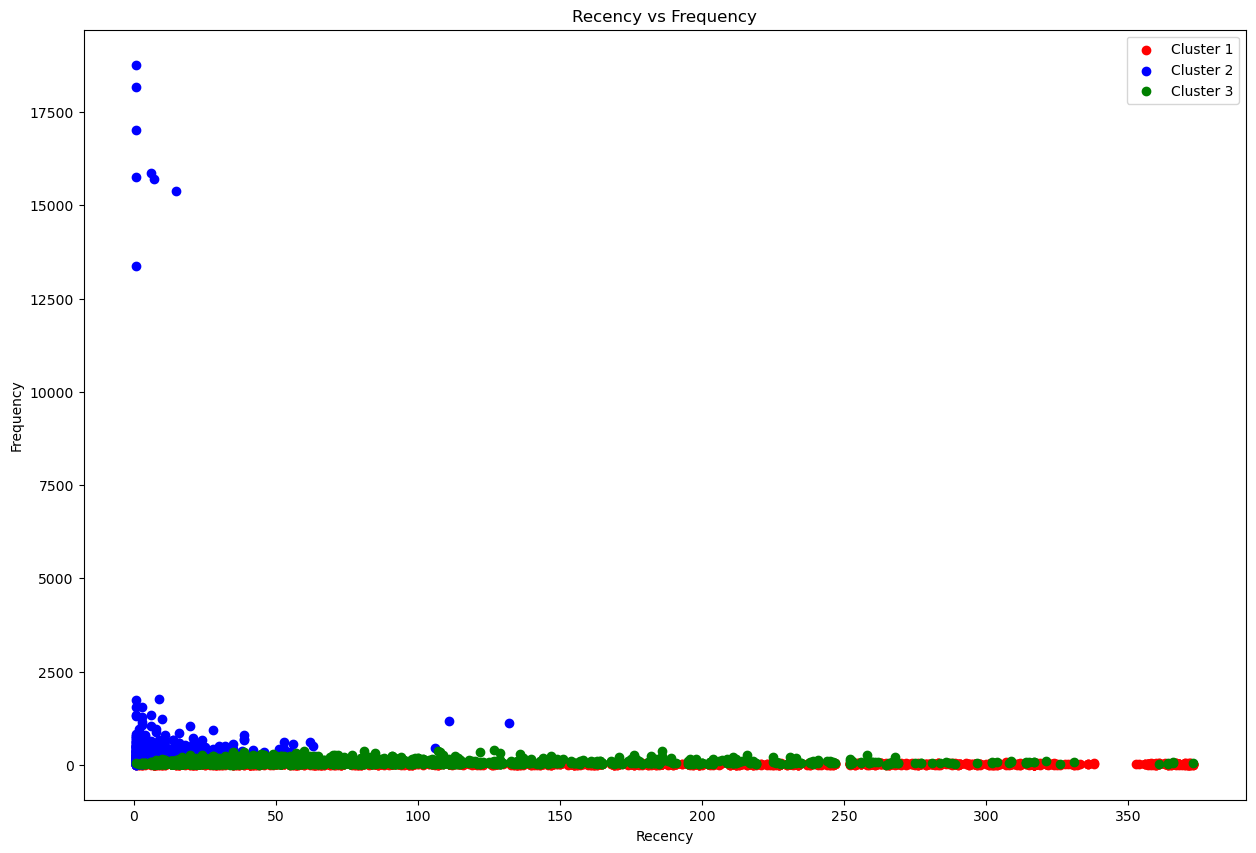

In [70]:
# Visualizing the data (Creating RECENCY VS FREQUENCY) 2D viz
plt.figure(figsize=(15,10))
plt.scatter(rfm_metrics[label==0]['recency'],rfm_metrics[label==0]['frequency'],label='Cluster 1',c='red')
plt.scatter(rfm_metrics[label==1]['recency'],rfm_metrics[label==1]['frequency'],label='Cluster 2',c='blue')
plt.scatter(rfm_metrics[label==2]['recency'],rfm_metrics[label==2]['frequency'],label='Cluster 3',c='green')
plt.legend()
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')
plt.show()

- Lower the recency higher is the frequency

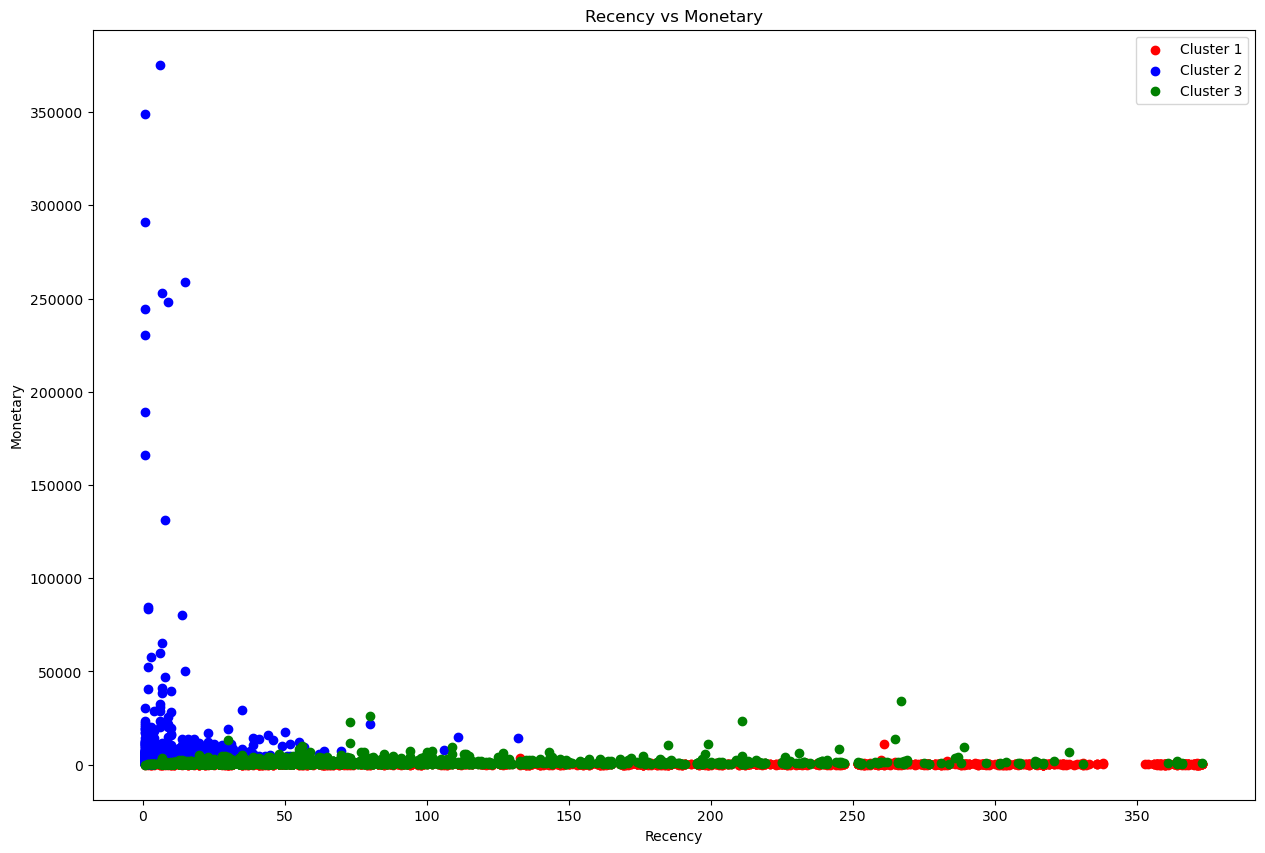

In [71]:
# Visualizing the data (Creating RECENCY VS MONETARY) 2D viz
plt.figure(figsize=(15,10))
plt.scatter(rfm_metrics[label==0]['recency'],rfm_metrics[label==0]['monetary'],label='Cluster 1',c='red')
plt.scatter(rfm_metrics[label==1]['recency'],rfm_metrics[label==1]['monetary'],label='Cluster 2',c='blue')
plt.scatter(rfm_metrics[label==2]['recency'],rfm_metrics[label==2]['monetary'],label='Cluster 3',c='green')
plt.legend()
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')
plt.show()

- Lower the recency higher is the monetary

<IPython.core.display.Javascript object>


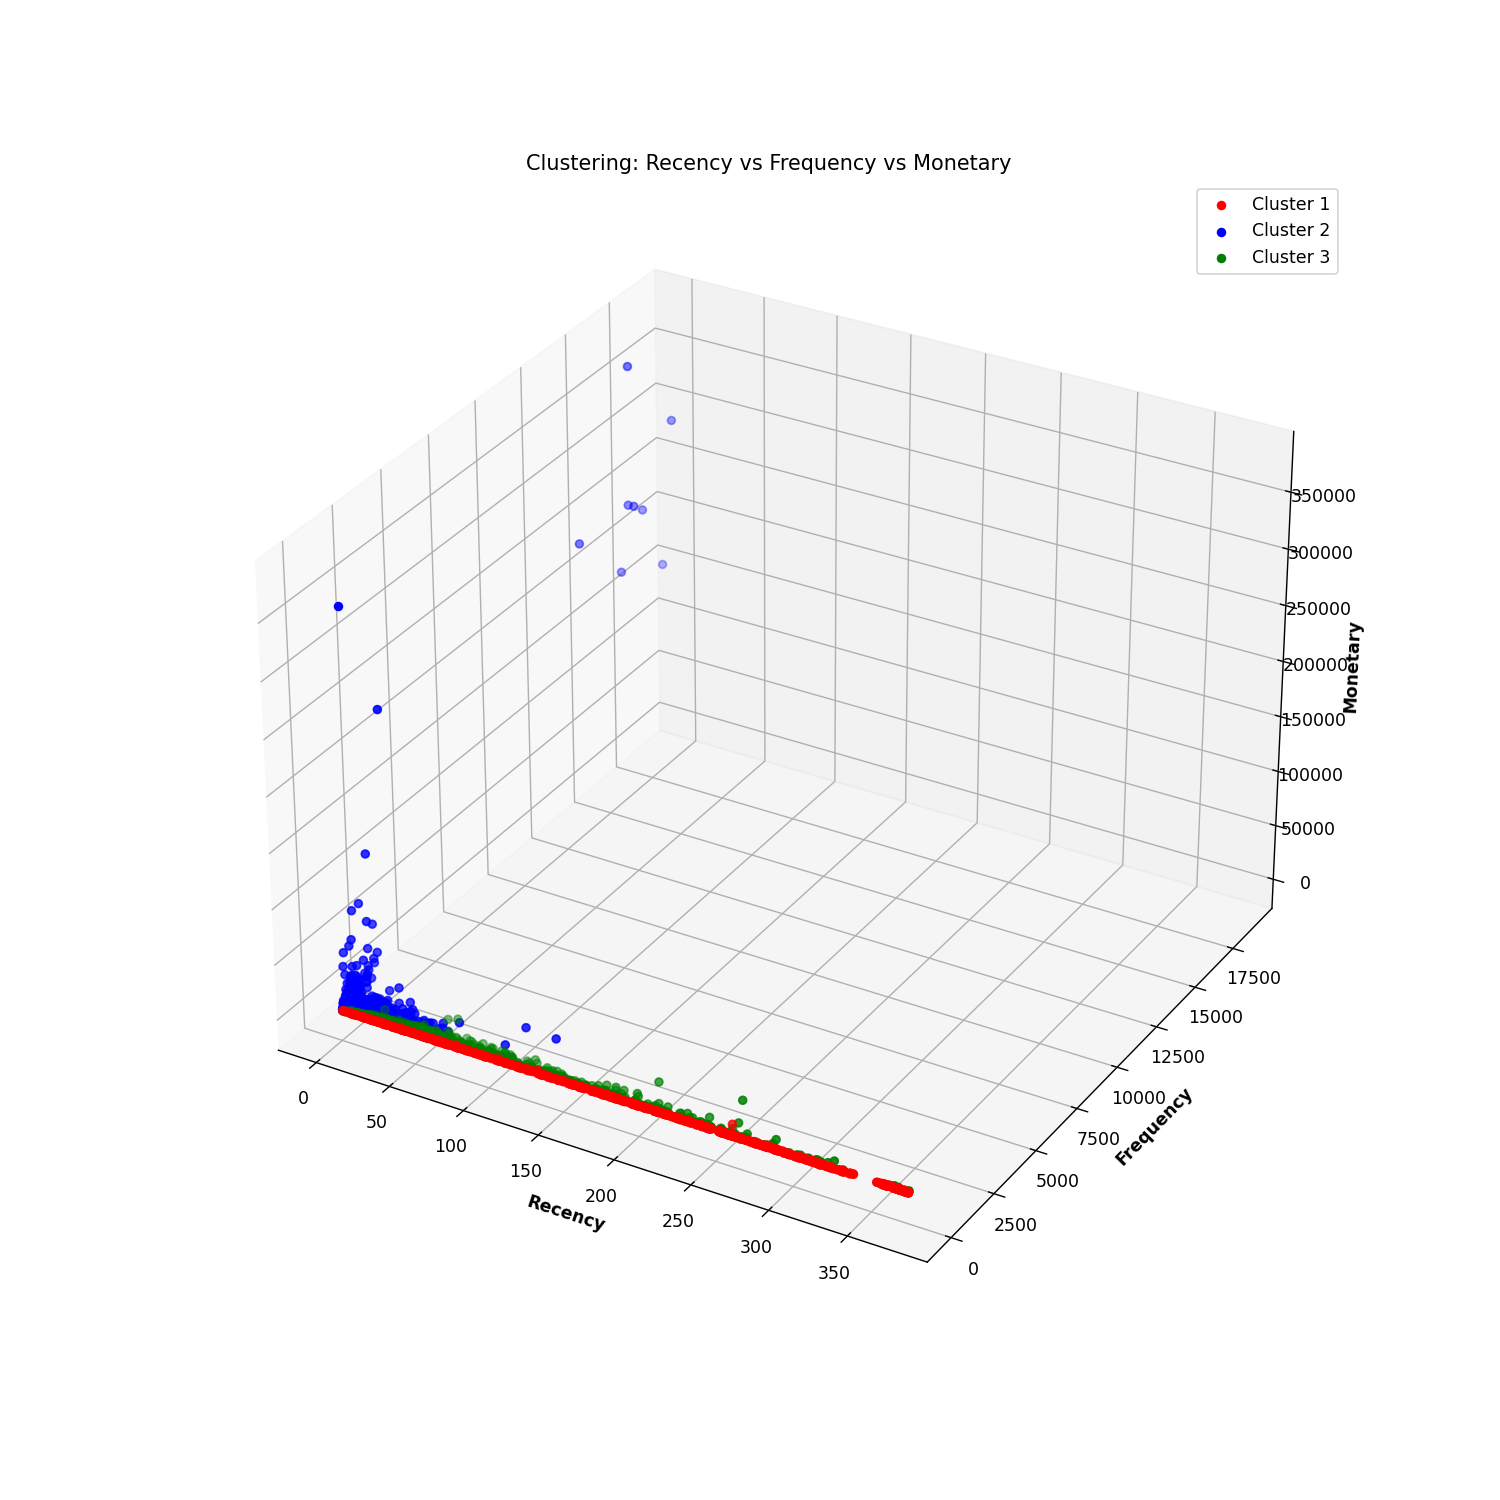

In [72]:
# Visualizing the data in 3D
%matplotlib notebook
plt.figure(figsize=(12,12))
ax=plt.axes(projection='3d')
ax.scatter(rfm_metrics[label==0]['recency'],rfm_metrics[label==0]['frequency'],rfm_metrics[label==0]['monetary'],label='Cluster 1',c='red')
ax.scatter(rfm_metrics[label==1]['recency'],rfm_metrics[label==1]['frequency'],rfm_metrics[label==1]['monetary'],label='Cluster 2',c='blue')
ax.scatter(rfm_metrics[label==2]['recency'],rfm_metrics[label==2]['frequency'],rfm_metrics[label==2]['monetary'],label='Cluster 3',c='green')
plt.xlabel('recency')
ax.set_xlabel('Recency', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary', fontweight ='bold')
plt.title('Clustering: Recency vs Frequency vs Monetary')
plt.legend()
plt.show()

- Insight 1: Recency and Frequency are inversely proportional(for cluster 3[Green])
             Customers belonging to cluster 3 (green) who made purchases recently had the highest visits to the website among all customers belonging to other clusters.
- Insight 2: The BIG spender cluster 3
             Customers in the cluster 3[green] are the most valuable of all.Majority of the revenue generated comes from these customers
- Insight 3: The LEAST spender cluster 1
             Customers belonging to RED cluster are churned customers. Recency has little to no effect on both frequency and monetary.
- Insight 3: The OCASSIONAL spender cluster 2
             Customers in this cluster occasionaly visit the wesite and spend money.Targetting these customers frequently with great offers such as discounts could help improve in keeping these customers more active.